In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import ssl
import certifi
import urllib

# Dataset

The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset you'll use in this project was downloaded from Kaggle at [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)  
Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)  

The dataset contains observations of weather metrics for each day from 2008 to 2017, and includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |

In [5]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
ssl_context = ssl.create_default_context(cafile=certifi.where())
with urllib.request.urlopen(file_path, context=ssl_context) as response:
    data = pd.read_csv(response)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Data pre-processing

In [6]:
data.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [7]:
# Drop rows with missing values
data = data.dropna()
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Data Leakage notes

**Consider the descriptions above for the columns in the data set. Are there any practical limitations to being able to predict whether it will rain tomorrow given the available data?**


Yes. Some columns contain information that wouldn’t be available at the time of prediction (e.g., end-of-day measurements or directly related rain indicators). Using them would cause data leakage, so in practice you cannot rely on all features to predict tomorrow’s rainfall.

**List some of the features that would be inefficient in predicting tomorrow's rainfall.**
- RainToday (already highly correlated with tomorrow’s rain)
- Rainfall (today’s total is not yet known when predicting tomorrow)
- Sunshine, Evaporation (only known after the day ends)
- 3pm readings (e.g., Cloud3pm, Humidity3pm, Temp3pm, Pressure3pm, WindDir3pm, WindSpeed3pm)



If we adjust our approach and aim to predict today’s rainfall using historical weather data up to and including yesterday, then we can legitimately utilize all of the available features. This shift would be particularly useful for practical applications, such as deciding whether you will bike to work today.

With this new target, we should update the names of the rain columns accordingly to avoid confusion.

In [8]:
data = data.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

## Data Granularity

Would the weather patterns have the same predictability in vastly different locations in Australia? I would think not.  
The chance of rain in one location can be much higher than in another. 
Using all of the locations requires a more complex model as it needs to adapt to local weather patterns.  
Let's see how many observations we have for each location, and see if we can reduce our attention to a smaller region.


## Location Selection

Let's group three locations together and use only their weather data to build our localized prediction model.
Because there might still be some slight variations in the weather patterns we'll keep Location as a categorical variable.

In [13]:
print(data['Location'].value_counts())
print('--------')

data = data[data.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
data.info()

Location
MelbourneAirport    2929
Watsonia            2730
Melbourne           1898
Name: count, dtype: int64
--------
<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 n

We still have 7557 records, which should be enough to build a reasonably good model.
You could always gather more data if needed by partioning the data into similar locations or simply by updating it from the source to include a larger time frame.

## Feature engineering: Extracting a seasonality feature

Now consider the Date column. We expect the weather patterns to be seasonal, having different predictablitiy levels in winter and summer for example.
There may be some variation with Year as well, but we'll leave that out for now. Let's engineer a Season feature from Date and drop Date afterward, since it is most likely less informative than season. An easy way to do this is to define a function that assigns seasons to given months, then use that function to transform the Date column.

In [14]:
def date_to_season(date):
  month = date.month
  if (month == 12) or (month == 1) or (month == 2):
    return 'Summer'
  elif (month == 3) or (month == 4) or (month == 5):
    return 'Autumn'
  elif (month == 6) or (month == 7) or (month == 8):
    return 'Winter'
  elif (month == 9) or (month == 10) or (month == 11):
    return 'Spring'

Map the dates to seasons and drop the Date column

In [15]:
data['Date'] = pd.to_datetime(data['Date'])
data['Season'] = data['Date'].apply(date_to_season)

data = data.drop(columns='Date')
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


Define the feature and target dataframes

In [17]:
X = data.drop(columns='RainToday', axis=1)
y = data['RainToday']

How balanced are the classes?

In [18]:
y.value_counts()

RainToday
No     5766
Yes    1791
Name: count, dtype: int64

### Exercise 4. What can you conclude from these counts?


- How often does it rain annualy in the Melbourne area?

In [28]:
rain_counts = y.value_counts()

total_days = len(y)
rainy_days = rain_counts['Yes']
rain_percentage = (rainy_days / total_days) * 100

print(f"% of days with rain: {rain_percentage:.1f}%")

% of days with rain: 23.7%


**How accurate would you be if you just assumed it won't rain every day?**

If you always predicted "No" (no rain), you would be correct on 5766 out of 7,557 days, giving you an accuracy of 76.3%. This is your baseline accuracy if you simply assumed it never rains.

**Is this a balanced dataset?**

No, this is not a balanced dataset. This represents a moderate class imbalance with the "No" class being more frequent than the "Yes" class


**Next steps?**

- Use appropriate evaluation metrics: Focus on precision, recall, and F1-score rather than just accuracy
- Consider class balancing techniques: Such as SMOTE, class weights, or stratified sampling
- Feature engineering: The notebook shows they're already creating seasonal features
- Model selection and tuning: Try different algorithms and hyperparameter tuning
- Cross-validation: Use stratified k-fold to ensure balanced representation in train/test splits
- Feature selection: Remove features that might cause data leakage (as noted in the notebook)
- Set realistic expectations: Aim to significantly beat the 64.1% baseline accuracy

### Exercise 5. Split data into training and test sets, ensuring target stratification

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y,random_state=42)

### Exercise 6. Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features

In [31]:
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

Define separate transformers for both feature types and combine them into a single preprocessing transformer

In [32]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transfomer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Exercise 7. Combine the transformers into a single preprocessing column transformer

In [33]:
preprocessor = ColumnTransformer(
  transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transfomer, categorical_features)
  ]
)

### Exercise 8. Create a pipeline by combining the preprocessing with a Random Forest classifier

In [34]:
pipeline = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('classifier', RandomForestClassifier(random_state=42))
])

Define a parameter grid to use in a cross validation grid search model optimizer

In [35]:
param_grid = {
  'classifier__n_estimators': [50, 100],
  'classifier__max_depth': [None, 10, 20],
  'classifier__min_samples_split': [2, 5]
}

Select a cross-validation method, ensuring target stratification during validation

In [36]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

### Exercise 9. Instantiate and fit GridSearchCV to the pipeline

In [38]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [50, 100]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [41]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.85


### Exercise 10. Display your model's estimated score

In [43]:
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.84


So we have a reasonably accurate classifer, which is expected to correctly predict about 84% of the time whether it will rain today in the Melbourne area.
But careful here. Let's take a deeper look at the results.

The best model is stored within the gridsearch object.

### Exercise 11. Get the model predictions from the grid search estimator on the unseen data

In [44]:
y_pred = grid_search.predict(X_test)

### Exercise 12. Print the classification report

In [45]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.95      0.90      1154
         Yes       0.75      0.51      0.61       358

    accuracy                           0.84      1512
   macro avg       0.81      0.73      0.75      1512
weighted avg       0.84      0.84      0.83      1512



### Exercise 13. Plot the confusion matrix 

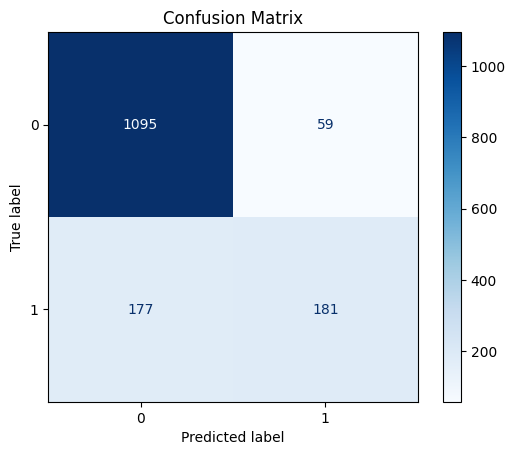

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Exercise 14. Extract the feature importances

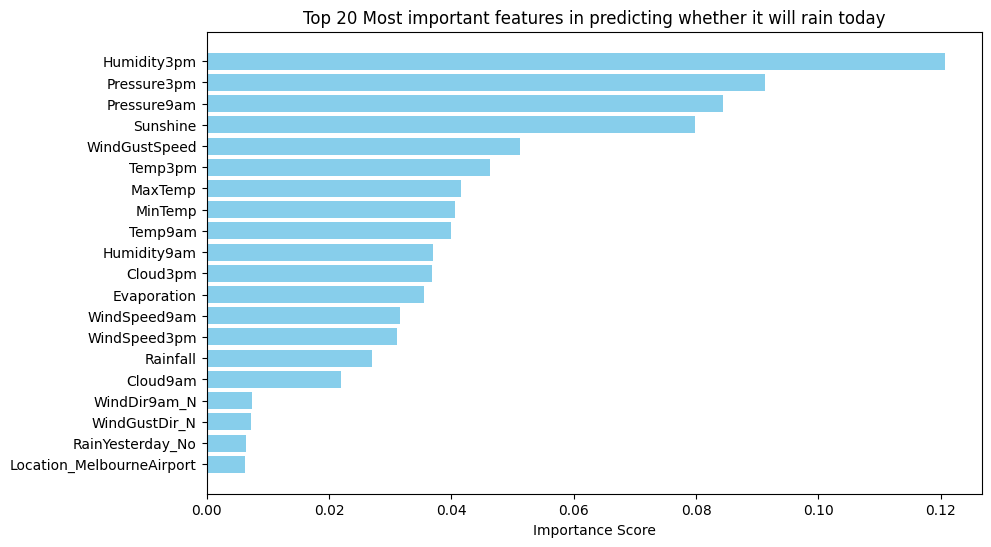

In [50]:
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                              }).sort_values(by='Importance', ascending=False)

N = 20
top_features = importance_df.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title(f"Top {N} Most important features in predicting whether it will rain today")
plt.xlabel('Importance Score')
plt.show()

### Exercise 15. Update the pipeline and the parameter grid

In [51]:
pipeline.set_params(classifier=LogisticRegression(random_state=42))

grid_search.estimator = pipeline
param_grid = {
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

grid_search.param_grid = param_grid
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.93      0.89      1154
         Yes       0.69      0.51      0.59       358

    accuracy                           0.83      1512
   macro avg       0.77      0.72      0.74      1512
weighted avg       0.82      0.83      0.82      1512



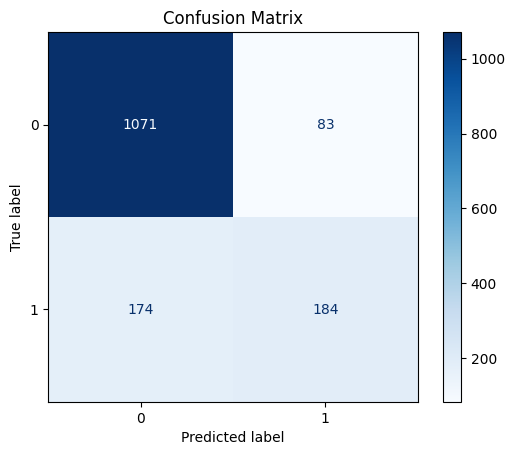

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**Accuracy Comparison**

Random Forest (previous confusion matrix):
	- Correct = TN + TP = 1095 + 181 = 1276
	- Total = 1512
	- Accuracy = 1276 / 1512 ≈ 84.3%

Logistic Regression (current confusion matrix):
	- Correct = TN + TP = 1071 + 184 = 1255
	- Total = 1512
	- Accuracy = 1255 / 1512 ≈ 83.0%

Random Forest is slightly more accurate (84.3%) than Logistic Regression (83.0%).


**Number of Correct Predictions**

	- Random Forest: 1276 correct (1095 TN + 181 TP)
	- Logistic Regression: 1255 correct (1071 TN + 184 TP)


**True Positive Rate (Recall for Rain) of Logistic Regression**

True Positive Rate (TPR) = TP / (TP + FN)

For Logistic Regression:
	- TP = 184
	- FN = 174
	- TPR = 184 / (184 + 174) = 184 / 358 ≈ 51.4%

Logistic Regression detects rain days about 51% of the time.


**Summary**

	- Random Forest: More accurate overall (84.3%), but rain recall was ≈ 50.6%.
	- Logistic Regression: Slightly lower accuracy (83.0%), but very similar rain recall (≈ 51.4%).
	- Both models are better at predicting “No Rain” than “Rain”, but Logistic Regression managed to get a few more rainy days correct (184 vs 181).
